In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diesel = np.loadtxt('Data/dieselPricesInRomania.csv', delimiter=',', skiprows=1, dtype=str)
gasoline = np.loadtxt('Data/gasolinePricesInRomania.csv', delimiter=',', skiprows=1, dtype=str)

In [4]:
priceGasoline = np.array(gasoline[:, 1], dtype=float)
priceDiesel = np.array(diesel[:, 1], dtype=float)
dates = np.array(diesel[:, 0])

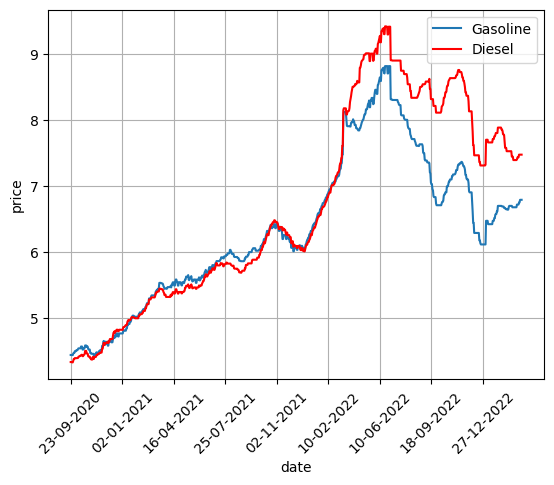

In [5]:
plt.plot(dates, priceGasoline)
plt.plot(dates, priceDiesel, 'r')
plt.legend(['Gasoline', 'Diesel'])
plt.ylabel('price')
plt.xlabel('date')
plt.grid()
plt.xticks(dates[::100], rotation=45)
plt.show()

In [6]:
print("Statistici pentru preturile benzinei si a motorinei")
print(f"Media pretului benzinei: {np.mean(priceGasoline)}")
print(f"Media pretului motorinei: {np.mean(priceDiesel)}")
print(f"Mediana benzinei este: {np.median(priceGasoline)}")
print(f"Mediana motorinei este: {np.median(priceDiesel)}")
correlation = np.corrcoef(priceGasoline, priceDiesel)[0, 1]
print("Corelatie intre cele 2 este", correlation)


Statistici pentru preturile benzinei si a motorinei
Media pretului benzinei: 6.341423515981735
Media pretului motorinei: 6.684747716894977
Mediana benzinei este: 6.2315000000000005
Mediana motorinei este: 6.306
Corelatie intre cele 2 este 0.9551947680763097


In [7]:
from datetime import datetime

# Convert dates to datetime objects
dates_datetime = np.array([datetime.strptime(date, "%d-%m-%Y") for date in dates])
# Convert datetime objects to the number of days from the first date
dates_numeric = (dates_datetime - dates_datetime[0]).astype('timedelta64[D]').astype(int)
# Convert datetime objects to the number of days from the first date
coef = np.polyfit(dates_numeric, priceGasoline, 1)
print("Coeficientii regresiei liniare: ", coef)
tendinta = np.polyval(coef, priceGasoline)

Coeficientii regresiei liniare:  [3.35206795e-03 4.83720216e+00]


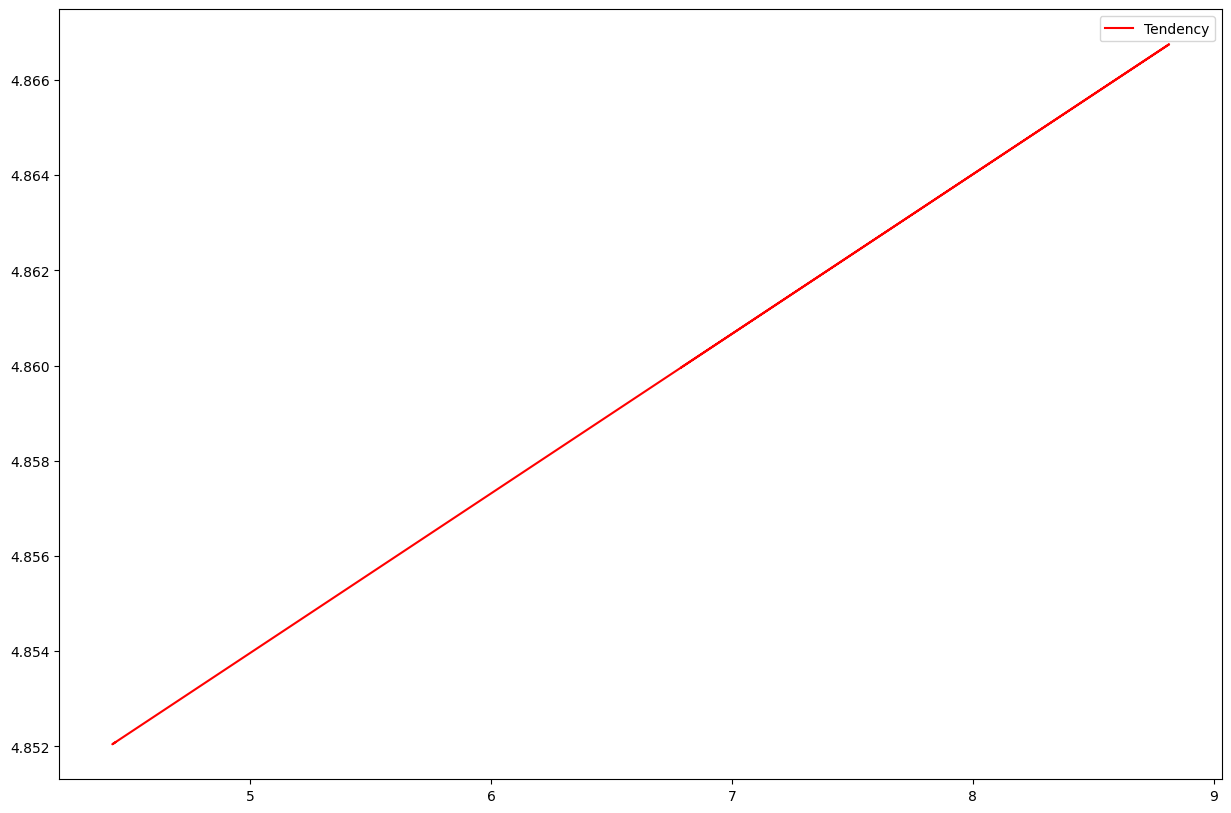

In [8]:
plt.figure(figsize=(15,10))
plt.plot(priceGasoline, tendinta, color="Red", label = "Tendency")
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# impartim datele in date de antrenare si date de testare
X_train, X_test, y_train, y_test = train_test_split(dates_numeric, priceGasoline, test_size=0.25)
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)
predictii = model.predict(X_test.reshape(-1, 1))
accuracy = model.score(X_test.reshape(-1, 1), y_test)
print(accuracy)

0.5990545814165341


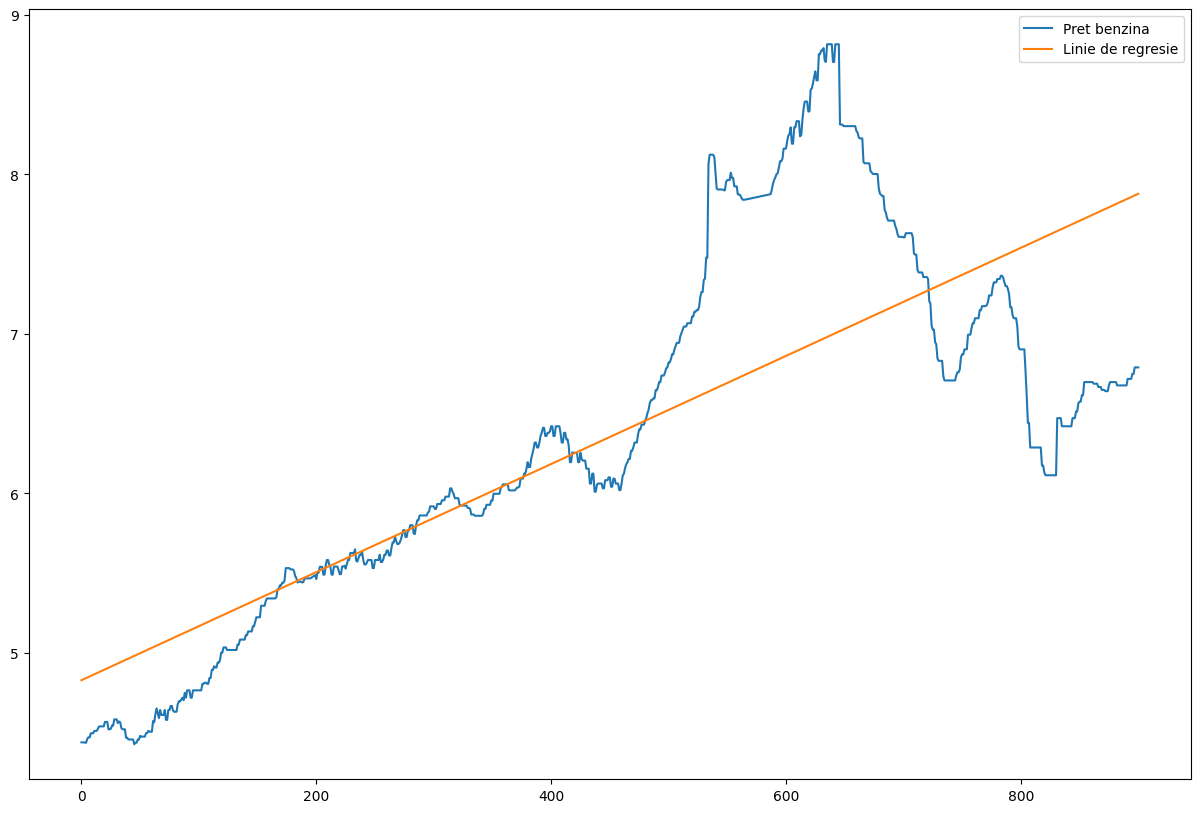

In [11]:
#plotam linia de regresie
plt.figure(figsize=(15,10))
plt.plot(dates_numeric, priceGasoline, label = "Pret benzina")
# plt.xticks(dates[::100], rotation = 45)
#afisam linia de regresie
plt.plot(dates_numeric, model.predict(dates_numeric.reshape(-1, 1)), label = "Linie de regresie")
plt.legend()
plt.show()

In [12]:
#calculam pretul carburantului in 2024
date_2023 = np.array([datetime.strptime("01-01-2023", "%d-%m-%Y")])
date_2023_numeric = (date_2023 - dates_datetime[0]).astype('timedelta64[D]').astype(int)
pret_2023 = model.predict(date_2023_numeric.reshape(-1, 1))
print(f"Pretul benzinei in 2023 va fi de {pret_2023[0]}")

Pretul benzinei in 2023 va fi de 7.640921209301318


In [13]:
# facem acelasi lucru si pentru motorina
X_train, X_test, y_train, y_test = train_test_split(dates_numeric, priceDiesel, test_size=0.25)
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)
predictii = model.predict(X_test.reshape(-1,1))
print(predictii)
accuracy = model.score(X_test.reshape(-1,1), y_test)
print(accuracy)

[6.36250957 5.57264184 7.22418344 5.36235239 4.88535435 8.30127579
 6.88566871 8.77827383 7.92172896 4.94177347 8.50130723 8.81417691
 4.98793457 4.70583896 5.65983503 5.12128886 4.71609698 4.73148401
 8.12688941 4.68532291 7.02415201 7.23957048 6.03425285 4.46990444
 6.04451087 8.01918018 8.77314482 5.34183634 6.84976563 8.7628868
 6.32660649 5.34696535 6.49073485 6.80360453 7.66014939 5.76754427
 5.35209436 7.03441003 4.82380621 6.07015593 5.62393196 4.62890379
 5.31619129 6.91644277 8.88085405 5.66496405 7.88069687 7.7986327
 6.71128233 5.38799744 6.6087021  4.71096797 5.02383765 4.84945127
 8.45001712 6.19838121 8.93727318 8.87059603 8.46027514 7.09595816
 6.24454231 8.47566217 5.61367393 8.4448881  5.85473746 8.62953251
 4.88022534 5.06999875 7.44473092 8.81930592 4.70070994 7.19853839
 4.59812972 8.32179184 8.92701515 6.15734912 8.27050172 8.89624109
 5.41877151 5.10077282 8.03456721 6.47534781 5.77267328 6.96773288
 5.90602757 6.92157178 4.61351675 8.67569361 8.34230788 5.541867

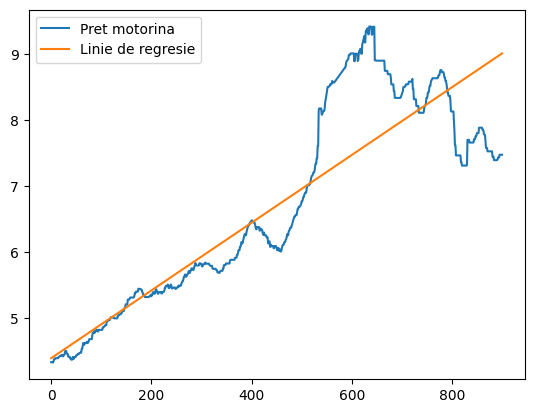

In [14]:
plt.plot(dates_numeric, priceDiesel, label = "Pret motorina")
plt.plot(dates_numeric, model.predict(dates_numeric.reshape(-1, 1)), label = "Linie de regresie")
plt.legend()
plt.show()

In [15]:
date_2023 = np.array([datetime.strptime("01-01-2023", "%d-%m-%Y")])
date_2023_numeric = (date_2023 - dates_datetime[0]).astype('timedelta64[D]').astype(int)
pret_2023 = model.predict(date_2023_numeric.reshape(-1, 1))
print(f"Pretul motorinei in 2023 va fi de {pret_2023[0]}")

Pretul motorinei in 2023 va fi de 8.65004855103427
